### 使用するライラリ

In [1]:
from  datetime import datetime, timedelta
import gc
import numpy as np, pandas as pd
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

### 作成済みDataFrameの読み込み

In [2]:
DF_FILE_PATH = '../input/pickle/df_baseline_ver1.pickle.gz'
SAMPLE_SUBMIT_PATH = '../input/csv/sample_submission.csv.gz'

In [3]:
df = pd.read_pickle(DF_FILE_PATH)

In [4]:
m_lgb = lgb.Booster(model_file="model_v1.0.lgb")

In [5]:
cat_feats = ['item_id', 'dept_id','store_id', 'cat_id', 'state_id']\
            + ['event_name_1', 'event_name_2', 'event_type_1', 'event_type_2']\
            + ['quarter', 'month', 'week', 'dayofweek']
useless_cols = ['id', 'date', 'demand','d', 'part', 'wm_yr_wk', 'weekday', 'day']
train_cols = df.columns[~df.columns.isin(useless_cols)]
del df
gc.collect()

40

In [6]:
# importanceを表示する
importance = pd.DataFrame(m_lgb.feature_importance(), index=train_cols, columns=['importance'])
importance = importance.sort_values('importance', ascending=False)
# importance.to_csv('importance_lightgbm_model_v1.0.csv')
display(importance)

,importance
item_id,141545
week,51158
store_id,8270
dayofweek,3854
rolling_mean_t30,3061
...,...
rolling_std_holiday_t180,0
rolling_std_holiday_t90,0
rolling_std_holiday_t60,0
rolling_std_holiday_t30,0


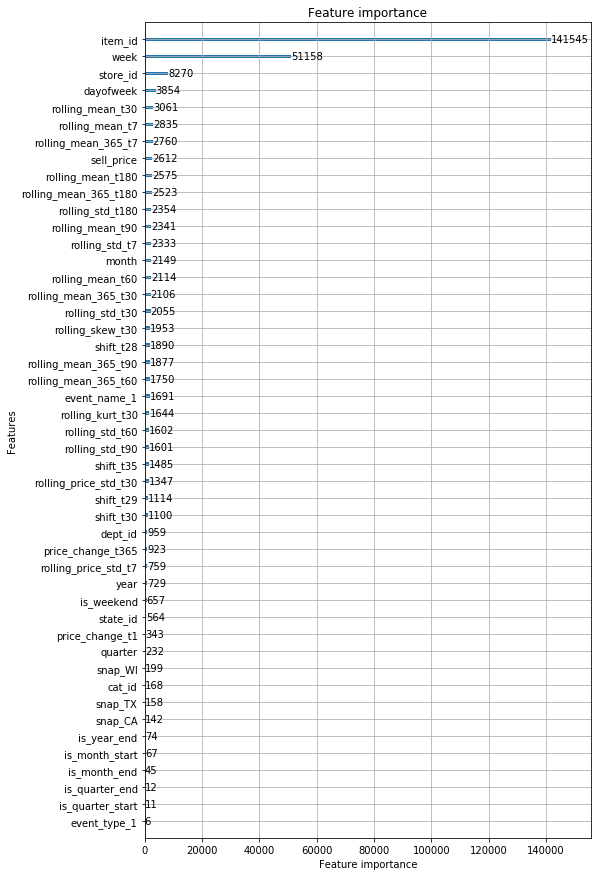

In [7]:
lgb.plot_importance(m_lgb, figsize=(8, 15))